In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import Cdf
import Pmf

import warnings
warnings.filterwarnings('ignore')

%pylab inline
from IPython.core.display import HTML
css = open('style-table.css').read()+open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

Populating the interactive namespace from numpy and matplotlib


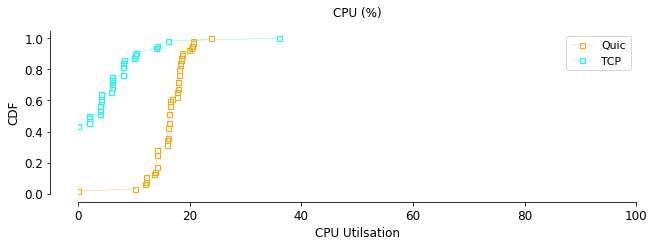

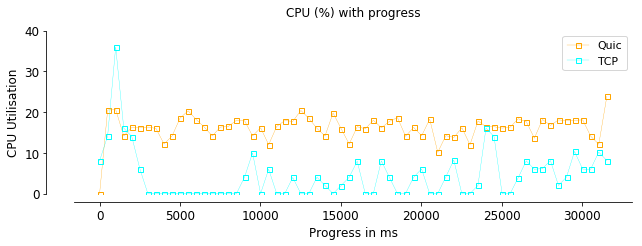

In [2]:
quic_cpu = "/home/rohit/Quic/throughput_youtube/1QUIC/Q044_cpu.csv"
tcp_cpu = "/home/rohit/Quic/throughput_youtube/1TCP/tcp_cpu.csv"

quic =  pd.read_csv(quic_cpu,',')
tcp = pd.read_csv(tcp_cpu, ',')

quic['Progress'] = quic['Timestamp'].apply(lambda x: x  - quic['Timestamp'].min() )
tcp['Progress'] = tcp['Timestamp'].apply(lambda x: x   - tcp['Timestamp'].min() )

quic.dropna()
tcp.dropna()

q = Cdf.MakeCdfFromList(quic['CPU'].values)
t = Cdf.MakeCdfFromList(tcp['CPU'].values)

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

plt.plot(q.xs, q.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(t.xs, t.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')

ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
ax.set_xlim([0, 100])
ax.set_xscale('linear')
ax.set_xlabel('CPU Utilsation', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Quic', 'TCP'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))


plt.title('CPU (%)', fontsize=12, y=1.05)
plt.savefig('./plots/youtube/cpu/cpupercent.png', format='png', bbox_inches='tight')

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
#yticks = np.arange(0,1.1,0.2)

plt.plot(quic['Progress'], quic['CPU'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(tcp['Progress'], tcp['CPU'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')

ax = fig.axes[0]
ax.grid(False)
#ax.set_yticks(yticks)
ax.set_ylim([0, 40])
#ax.set_xlim([0, 20000])
ax.set_xscale('linear')
ax.set_xlabel('Progress in ms', fontsize=12)
ax.set_ylabel('CPU Utilisation', fontsize=12)

plt.legend(['Quic', 'TCP'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))


plt.title('CPU (%) with progress', fontsize=12, y=1.05)
plt.savefig('./plots/youtube/cpu/cpupercentprogress.png', format='png', bbox_inches='tight')

In [5]:
print(quic['CPU'].astype(float).max())
print(tcp['CPU'].astype(float).max())

30.30303
36.0


In [4]:
quic_cpu = "/home/rohit/Quic/throughput_youtube/1QUIC1TCP/Q044_cpu.csv"
tcp_cpu = "/home/rohit/Quic/throughput_youtube/1QUIC1TCP/tcp_cpu.csv"

quic =  pd.read_csv(quic_cpu,',')
tcp = pd.read_csv(tcp_cpu, ',')

quic['Progress'] = quic['Timestamp'].apply(lambda x: x  - quic['Timestamp'].min() )
tcp['Progress'] = tcp['Timestamp'].apply(lambda x: x   - tcp['Timestamp'].min() )

q = Cdf.MakeCdfFromList(quic['CPU'].values)
t = Cdf.MakeCdfFromList(tcp['CPU'].values)

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

plt.plot(q.xs, q.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(t.xs, t.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')

ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
ax.set_xlim([0, 100])
ax.set_xscale('linear')
ax.set_xlabel('CPU Utilsation', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Quic', 'TCP'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))


plt.title('CPU (%) CDF QUIC+TCP', fontsize=12, y=1.05)
plt.savefig('./plots/youtube/cpu/cpupercentQUIC+TCP.png', format='png', bbox_inches='tight')

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
#yticks = np.arange(0,1.1,0.2)

plt.plot(quic['Progress'], quic['CPU'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(tcp['Progress'], tcp['CPU'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')

ax = fig.axes[0]
ax.grid(False)
#ax.set_yticks(yticks)
ax.set_ylim([0, 100])
#ax.set_xlim([0, 20000])
ax.set_xscale('linear')
ax.set_xlabel('Progress in ms', fontsize=12)
ax.set_ylabel('CPU Utilisation', fontsize=12)

plt.legend(['Quic', 'TCP'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))


plt.title('CPU (%) with progress QUIC+TCP', fontsize=12, y=1.05)
plt.savefig('./plots/youtube/cpu/cpupercentprogressQUIC+TCP.png', format='png', bbox_inches='tight')

EmptyDataError: No columns to parse from file

In [ ]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)


tcp_cpu = "/home/rohit/Quic/throughput_youtube/2TCP/tcp_cpu_1.csv"
tcp = pd.read_csv(tcp_cpu, ',')
tcp['Progress'] = tcp['Timestamp'].apply(lambda x: x   - tcp['Timestamp'].min() )
t = Cdf.MakeCdfFromList(tcp['CPU'].values)
plt.plot(t.xs, t.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')

tcp_2_cpu = "/home/rohit/Quic/throughput_youtube/2TCP/tcp_cpu_2.csv"
tcp_2 = pd.read_csv(tcp_2_cpu, ',')
tcp_2['Progress'] = tcp_2['Timestamp'].apply(lambda x: x   - tcp_2['Timestamp'].min() )
t_2 = Cdf.MakeCdfFromList(tcp_2['CPU'].values)
plt.plot(t_2.xs, t_2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
ax.set_xlim([0, 100])
ax.set_xscale('linear')
ax.set_xlabel('CPU Utilsation TCP+TCP', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend([ 'TCP 1', 'TCP 2'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))


plt.title('CPU (%)', fontsize=12, y=1.05)
plt.savefig('./plots/youtube/cpu/cpupercentTCP+TCP.png', format='png', bbox_inches='tight')

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
#yticks = np.arange(0,1.1,0.2)


plt.plot(tcp['Progress'], tcp['CPU'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')

plt.plot(tcp_2['Progress'], tcp_2['CPU'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')

ax = fig.axes[0]
ax.grid(False)
#ax.set_yticks(yticks)
ax.set_ylim([0, 100])
#ax.set_xlim([0, 50000])
ax.set_xscale('linear')
ax.set_xlabel('Progress in ms', fontsize=12)
ax.set_ylabel('CPU Utilisation', fontsize=12)

plt.legend([ 'TCP 1', 'TCP 2'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))


plt.title('CPU (%) with progress TCP+TCP', fontsize=12, y=1.05)
plt.savefig('./plots/youtube/cpu/cpupercentprogressTCP+TCP.png', format='png', bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)


tcp_cpu = "/home/rohit/Quic/throughput_youtube/1QUIC2TCP/tcp_cpu_1.csv"
tcp = pd.read_csv(tcp_cpu, ',')
tcp['Progress'] = tcp['Timestamp'].apply(lambda x: x   - tcp['Timestamp'].min() )
t = Cdf.MakeCdfFromList(tcp['CPU'].values)
plt.plot(t.xs, t.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')

tcp_2_cpu = "/home/rohit/Quic/throughput_youtube/1QUIC2TCP/tcp_cpu_2.csv"
tcp_2 = pd.read_csv(tcp_2_cpu, ',')
tcp_2['Progress'] = tcp_2['Timestamp'].apply(lambda x: x   - tcp_2['Timestamp'].min() )
t_2 = Cdf.MakeCdfFromList(tcp_2['CPU'].values)
plt.plot(t_2.xs, t_2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')

quic_cpu = "/home/rohit/Quic/throughput_youtube/1QUIC2TCP/Q044_cpu.csv"
quic =  pd.read_csv(quic_cpu,',')
quic['Progress'] = quic['Timestamp'].apply(lambda x: x  - quic['Timestamp'].min() )
q = Cdf.MakeCdfFromList(quic['CPU'].values)
plt.plot(q.xs, q.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
ax.set_xlim([0, 100])
ax.set_xscale('linear')
ax.set_xlabel('CPU Utilsation', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend([ 'TCP 1', 'TCP 2' ,'QUIC'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))


plt.title('CPU (%) CDF 1QUIC+2TCP' , fontsize=12, y=1.05)
plt.savefig('./plots/youtube/cpu/cpupercent1QUIC+2TCP.png', format='png', bbox_inches='tight')

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
#yticks = np.arange(0,1.1,0.2)

plt.plot(quic['Progress'], quic['CPU'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(tcp['Progress'], tcp['CPU'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')

plt.plot(tcp_2['Progress'], tcp_2['CPU'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')

ax = fig.axes[0]
ax.grid(False)
#ax.set_yticks(yticks)
ax.set_ylim([0, 100])
#ax.set_xlim([0, 50000])
ax.set_xscale('linear')
ax.set_xlabel('Progress in ms', fontsize=12)
ax.set_ylabel('CPU Utilisation', fontsize=12)

plt.legend([ 'QUIC', 'TCP 1', 'TCP 2'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))


plt.title('CPU (%) with progress 1QUIC+2TCP', fontsize=12, y=1.05)
plt.savefig('./plots/youtube/cpu/cpupercentprogress1QUIC+2TCP.png', format='png', bbox_inches='tight')